## A  Detailed  View  to  MNIST  Classification 
#### MNIST Classification using DNN and Analysis of behaviour in various hidden layers

In [0]:
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [0]:
#Reading the MNIST image files
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### Definition of Neural Network 1: <br>
-> Input dimensions = 784 <br> 
-> 5 hidden layers with 1024 hidden units each <br>
-> Random normal initialization for biases and weights<br>
-> Adam optimizer and cross entropy loss function with logits.<br>
-> ReLu activation function<br>
-> Default learning rate of Adam Optimizer = 0.001<br>
-> Output layer dimensions = 10 (0-9 classes) 

In [0]:
#Defining the neural network:
#MNIST Classification 0-9 - 10 classes one hot encoded

#Hidden layers:
n_nodes_hl1 = 1024
n_nodes_hl2 = 1024
n_nodes_hl3 = 1024
n_nodes_hl4 = 1024
n_nodes_hl5 = 1024


#Classes
n_classes = 10
batch_size = 150
n_epochs = 15

x = tf.placeholder('float',[None,784])
y = tf.placeholder('float')

In [0]:
#Computation Graph for NN
def mnist_nn_model(data):
  
  h1 = {'w':tf.Variable(tf.random_normal([784,n_nodes_hl1])),'b':tf.Variable(tf.random_normal([n_nodes_hl1]))}
  h2 = {'w':tf.Variable(tf.random_normal([n_nodes_hl1,n_nodes_hl2])),'b':tf.Variable(tf.random_normal([n_nodes_hl2]))}
  h3 = {'w':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl3])),'b':tf.Variable(tf.random_normal([n_nodes_hl3]))}
  h4 = {'w':tf.Variable(tf.random_normal([n_nodes_hl3,n_nodes_hl4])),'b':tf.Variable(tf.random_normal([n_nodes_hl4]))}
  h5 = {'w':tf.Variable(tf.random_normal([n_nodes_hl4,n_nodes_hl5])),'b':tf.Variable(tf.random_normal([n_nodes_hl5]))}
  output_layer = {'w':tf.Variable(tf.random_normal([n_nodes_hl5,n_classes])),'b':tf.Variable(tf.random_normal([n_classes]))}
  
  
  #(input_data*weights) + biases
  l1 = tf.add(tf.matmul(data, h1['w']),h1['b'])
  l1 = tf.nn.relu(l1)
  l2 = tf.add(tf.matmul(l1, h2['w']),h2['b'])
  l2 = tf.nn.relu(l2)
  l3 = tf.add(tf.matmul(l2, h3['w']),h3['b'])
  l3 = tf.nn.relu(l3)
  l4 = tf.add(tf.matmul(l3, h4['w']),h4['b'])
  l4 = tf.nn.relu(l4)
  l5 = tf.add(tf.matmul(l4, h5['w']),h5['b'])
  l5 = tf.nn.relu(l5)
  
  output = tf.add(tf.matmul(l5, output_layer['w']),output_layer['b'])
  return(output)

#### Definition of Neural Network 2: <br>
-> Input dimensions = 784 <br>
-> 5 hidden layers with 1024 hidden units each <br>
-> Xavier Initialization for weights Random normal initialization for biases<br>
-> Adam optimizer and cross entropy loss function with logits.<br>
-> ReLu activation function<br>
-> Default learning rate of Adam Optimizer = 0.001 <br>
-> Output Layer dimensions = 10 (0-9 classes)


In [0]:
#Computation Graph with Xavier Initialization
def mnist_xavier_init_nn_model(data):
  
  h1 = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([784,n_nodes_hl1])),'b':tf.Variable(tf.random_normal([n_nodes_hl1]))}
  h2 = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([n_nodes_hl1,n_nodes_hl2])),'b':tf.Variable(tf.random_normal([n_nodes_hl2]))}
  h3 = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([n_nodes_hl2,n_nodes_hl3])),'b':tf.Variable(tf.random_normal([n_nodes_hl3]))}
  h4 = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([n_nodes_hl3,n_nodes_hl4])),'b':tf.Variable(tf.random_normal([n_nodes_hl4]))}
  h5 = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([n_nodes_hl4,n_nodes_hl5])),'b':tf.Variable(tf.random_normal([n_nodes_hl5]))}
  output_layer = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([n_nodes_hl5,n_classes])),'b':tf.Variable(tf.random_normal([n_classes]))}
  
  
  #(input_data*weights) + biases
  l1 = tf.add(tf.matmul(data, h1['w']),h1['b'])
  l1 = tf.nn.relu(l1)
  l2 = tf.add(tf.matmul(l1, h2['w']),h2['b'])
  l2 = tf.nn.relu(l2)
  l3 = tf.add(tf.matmul(l2, h3['w']),h3['b'])
  l3 = tf.nn.relu(l3)
  l4 = tf.add(tf.matmul(l3, h4['w']),h4['b'])
  l4 = tf.nn.relu(l4)
  l5 = tf.add(tf.matmul(l4, h5['w']),h5['b'])
  l5 = tf.nn.relu(l5)
  
  output = tf.add(tf.matmul(l5, output_layer['w']),output_layer['b'])
  return(output)

In [0]:
def train_mnist_nn_model(x):
  #pred = mnist_nn_model(x)
  pred = mnist_xavier_init_nn_model(x)
  cost_func = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y) )
  optimizer = tf.train.AdamOptimizer().minimize(cost_func)
  
  with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for epoch in range(n_epochs):
      epoch_loss = 0
      for _ in range(int(mnist.train.num_examples/batch_size)):
        epoch_x,epoch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost_func], feed_dict = {x:epoch_x, y:epoch_y})
        epoch_loss += c
      print('epoch',epoch,'loss',epoch_loss)
    correct = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct,'float'))
    print('Accuracy',accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))

In [0]:
train_mnist_nn_model(x)

epoch 0 loss 166.07041484117508
epoch 1 loss 40.867659509181976
epoch 2 loss 28.51783799752593
epoch 3 loss 21.231135646114126
epoch 4 loss 17.123580362647772
epoch 5 loss 13.005194968776777
epoch 6 loss 12.920408712001517
epoch 7 loss 11.2702219535131
epoch 8 loss 9.976413408876397
epoch 9 loss 8.16907577434904
epoch 10 loss 9.094677912216866
epoch 11 loss 6.447360536025371
epoch 12 loss 6.097167664061999
epoch 13 loss 8.403691168205114
epoch 14 loss 5.799259171253652
Accuracy 0.9811


---
---

#### Final Neural Network Configuration: <br>


After testing for random normal and xavier initialization, finally incorporated the Xavier initialization as it gives above 98% accuracy.<br>
-> Input dimentsions = 784 <br>
-> 5 hidden layers with 1024 hidden units each <br>
-> Xavier Initialization for and weights Random normal initialization for biases<br>
-> Adam optimizer and cross entropy loss function with logits.<br>
-> ReLu activation function for all the layers.<br>
-> Default learning rate of Adam Optimizer = 0.001 <br>
-> Output Layer dimensions = 10 (0-9 classes)

I have used this DNN for further analysis,



In [0]:
random.seed(50)
data = x
h1 = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([784,n_nodes_hl1])),'b':tf.Variable(tf.random_normal([n_nodes_hl1]))}
h2 = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([n_nodes_hl1,n_nodes_hl2])),'b':tf.Variable(tf.random_normal([n_nodes_hl2]))}
h3 = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([n_nodes_hl2,n_nodes_hl3])),'b':tf.Variable(tf.random_normal([n_nodes_hl3]))}
h4 = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([n_nodes_hl3,n_nodes_hl4])),'b':tf.Variable(tf.random_normal([n_nodes_hl4]))}
h5 = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([n_nodes_hl4,n_nodes_hl5])),'b':tf.Variable(tf.random_normal([n_nodes_hl5]))}
output_layer = {'w':tf.Variable(tf.contrib.layers.xavier_initializer()([n_nodes_hl5,n_classes])),'b':tf.Variable(tf.random_normal([n_classes]))}
keep_prob = tf.placeholder(tf.float32)

#(input_data*weights) + biases
l1 = tf.add(tf.matmul(data, h1['w']),h1['b'])
l1 = tf.nn.relu(l1)
l2 = tf.add(tf.matmul(l1, h2['w']),h2['b'])
l2 = tf.nn.relu(l2)
l3 = tf.add(tf.matmul(l2, h3['w']),h3['b'])
l3 = tf.nn.relu(l3)
l4 = tf.add(tf.matmul(l3, h4['w']),h4['b'])
l4 = tf.nn.relu(l4)
l5 = tf.add(tf.matmul(l4, h5['w']),h5['b'])
l5 = tf.nn.relu(l5)

output = tf.add(tf.matmul(l5, output_layer['w']),output_layer['b'])

pred = output
cost_func = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y) )
optimizer = tf.train.AdamOptimizer().minimize(cost_func)
  
with tf.Session() as sess:
  sess.run(tf.initialize_all_variables())
  for epoch in range(n_epochs):
    epoch_loss = 0
    for _ in range(int(mnist.train.num_examples/batch_size)):
      epoch_x,epoch_y = mnist.train.next_batch(batch_size)
      _,c = sess.run([optimizer,cost_func], feed_dict = {x:epoch_x, y:epoch_y})
      epoch_loss += c
    print('epoch',epoch,'loss',epoch_loss)
  correct = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct,'float'))
  print('Accuracy',accuracy.eval({x:mnist.test.images,y:mnist.test.labels})*100, "%")
  sample_test = random.sample(range(0, len(mnist.test.images)), 1000)
  #output_probablities   = sess.run(pred, feed_dict = {x:mnist.test.images[sample_test]})
  output_final_layer   = sess.run(output, feed_dict={x:mnist.test.images[sample_test]}) 
  hidden_layer1_output = sess.run(l1, feed_dict={x:mnist.test.images[sample_test]})
  hidden_layer2_output = sess.run(l2, feed_dict={x:mnist.test.images[sample_test]})
  hidden_layer3_output = sess.run(l3, feed_dict={x:mnist.test.images[sample_test]})
  hidden_layer4_output = sess.run(l4, feed_dict={x:mnist.test.images[sample_test]})
  hidden_layer5_output = sess.run(l5, feed_dict={x:mnist.test.images[sample_test]})
  hidden_layer5_prob = sess.run(tf.argmax(hidden_layer5_output,1))
  last_layer_output = sess.run(tf.argmax(output_final_layer,1))

epoch 0 loss 168.57005447894335
epoch 1 loss 41.54077281244099
epoch 2 loss 28.453047580085695
epoch 3 loss 21.767466070130467
epoch 4 loss 16.734392863232642
epoch 5 loss 13.963301116833463
epoch 6 loss 11.485305951006012
epoch 7 loss 12.041863436228596
epoch 8 loss 8.310491490527056
epoch 9 loss 9.160862803488271
epoch 10 loss 9.70862365909852
epoch 11 loss 6.744226833980065
epoch 12 loss 6.4306174348712375
epoch 13 loss 6.0113059718642035
epoch 14 loss 7.895604830067896
Accuracy 98.25000166893005 %



#### Q 1.3: 

At the outset, after defining the network, the outputs of different layers have been noted and later used for analysis, as you can see in the below code, the output of the last layer has been analysed and the input images associated with the outputs has been generated.



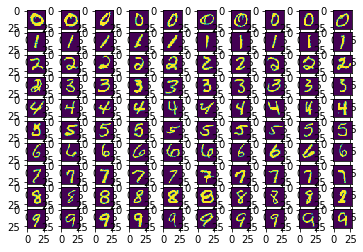

In [0]:
last_layer = {}
fig,axis = plt.subplots(10,10)

for i in range(len(last_layer_output)):
    if last_layer_output[i] in last_layer:
        last_layer[last_layer_output[i]].append(sample_test[i])
    else:
        last_layer[last_layer_output[i]] = [sample_test[i]]

for i in last_layer.keys():
    for j in range(10):
        axis[i,j].imshow(mnist.test.images[last_layer[i][j],:].reshape(28,28))


#### Q 1.4 The last but one hidden layer outputs and there associated images are being printed in a 10X10 grid as shown below,

#### Explain your observation compared with the results from 1.3.What can you  see? <br>
Results from Q 1.3 are properly grouped because it is the output layer(softmax), where as the hidden layer due to 1024 dimensions and the random selection of 10 features has given rows without even images. These random features may or may not be important enough to group the images into 0-9 classes.




#### What  would  have  been  the  ideal  situation  for  this  second-to-the-last layer?<br>

If the 10 random features that we would have picked are important and helped in predicting better then the grouping would have been much better.

#### Additional Insights:

3 and 8 are images which are often when written may be confusing to interpret same goes with similar looking numbers like 0 and 6 too. In this case the last but one hidden layer may be grouping the numbers in this manner. And later the neurons are firing the activations into output layer by finally grouping them from the individual groups of last but one hidden layer.

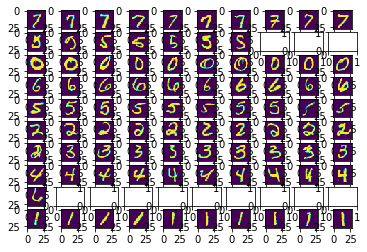

In [0]:
hidden_layer = {}
hidden_layer_ = {}
c = 0
fig,axis = plt.subplots(10,10)

for i in range(len(hidden_layer5_prob)):
    if hidden_layer5_prob[i] in hidden_layer:
        hidden_layer[hidden_layer5_prob[i]].append(sample_test[i])
    else:
        hidden_layer[hidden_layer5_prob[i]] = [sample_test[i]]


for key in hidden_layer.keys():
    if key not in hidden_layer_.keys():
        hidden_layer_[key] = c
        c += 1

for i in hidden_layer.keys():
    if hidden_layer_[i]<10:
      for j in range(len(hidden_layer[i])):
        if j<10:
          axis[hidden_layer_[i], j].imshow(mnist.test.images[hidden_layer[i][j], :].reshape(28, 28))
    else:
      break
    



#### Q 1.6:

As we have already took the outputs of different layers during the neural network session, here using that I have decreased the dimensionality of the image set by randomly sampling 1000 test images and taking only 2 components in PCA and t- SNE.

I have made the comparision by plotting the PCA and tSNE techniques side by side for the input layer, all the hidden layers and the output layer.
The raw image samples are much better to visualize now in a two dimensional point of view.
But after passing through the network, only we can see whether they are being classified better or not!


In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def plot_compare_PCA_tsne(layer,title):

  labels = np.argmax(mnist.test.labels[sample_test], axis=1)

  pca = PCA(n_components=2).fit_transform(layer)
  tsne = TSNE(n_components=2).fit_transform(layer)

  pca=pca.T
  tsne=tsne.T
  fig,axis=plt.subplots(1,2,figsize=(10, 10))
  
  axis[0].scatter(pca[0],pca[1],s = 5,c =np.argmax(mnist.test.labels[sample_test],axis=1),cmap=plt.cm.get_cmap('Spectral', 10))
  for i in range(10):
    x_pca_mean = np.mean(np.take(pca[0], np.argwhere(labels == i)))
    y_pca_mean = np.mean(np.take(pca[1], np.argwhere(labels == i)))
    axis[0].text(x_pca_mean, y_pca_mean, i, color = '0', fontsize = 12)
  axis[0].set_title('PCA')


  axis[1].scatter(tsne[0],tsne[1],s = 5,c= np.argmax(mnist.test.labels[sample_test],axis=1), cmap=plt.cm.get_cmap('Spectral', 10))
  for i in range(10):
    x_tsne_mean = np.mean(np.take(tsne[0], np.argwhere(labels == i)))
    y_tsne_mean = np.mean(np.take(tsne[1], np.argwhere(labels == i)))
    axis[1].text(x_tsne_mean, y_tsne_mean, i, color = '0', fontsize = 12)
  axis[1].set_title('tSNE')

  fig.suptitle(title)
  plt.show()
  

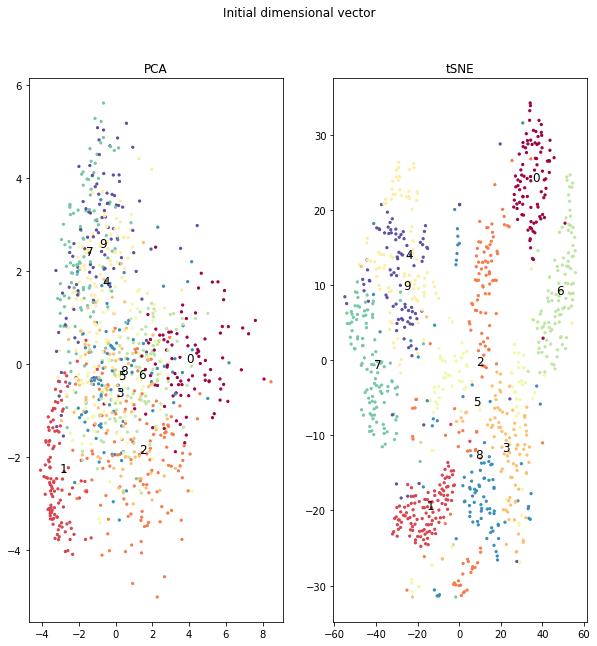

In [0]:
plot_compare_PCA_tsne(mnist.test.images[sample_test],"Initial dimensional vector")



#### Q1.7 Layer wise PCA and t-SNE comparision and analysis

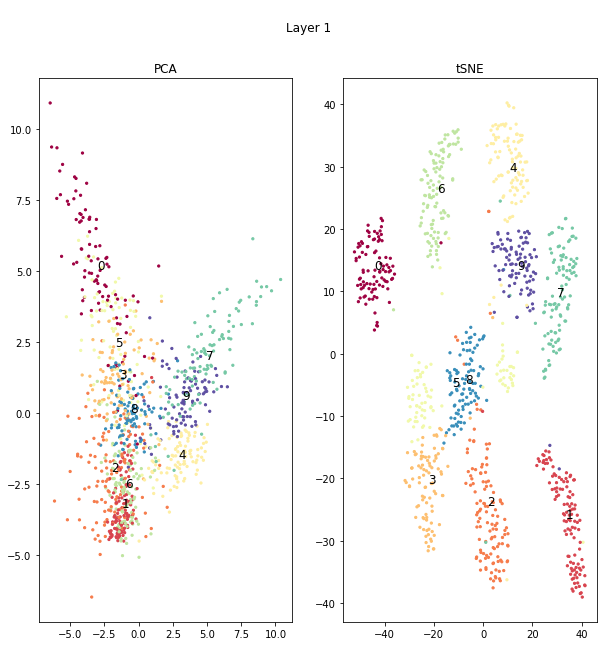

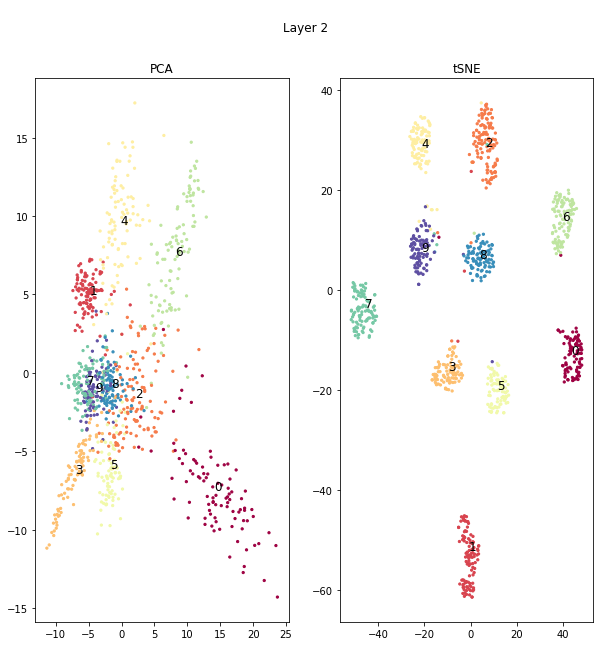

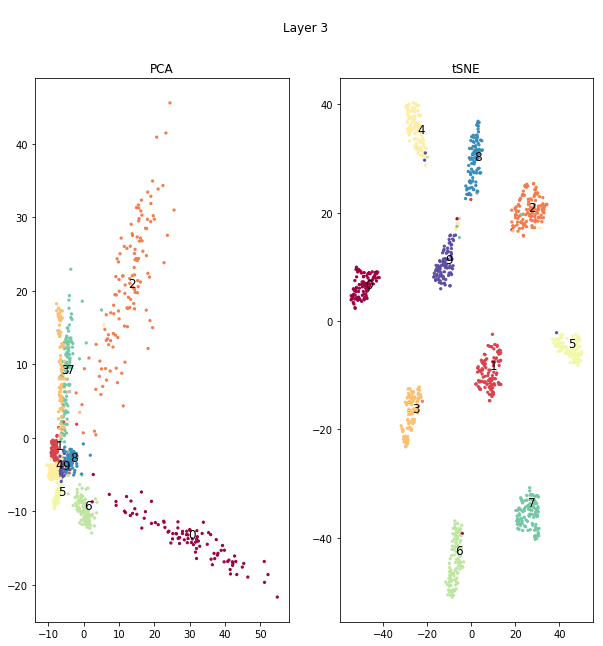

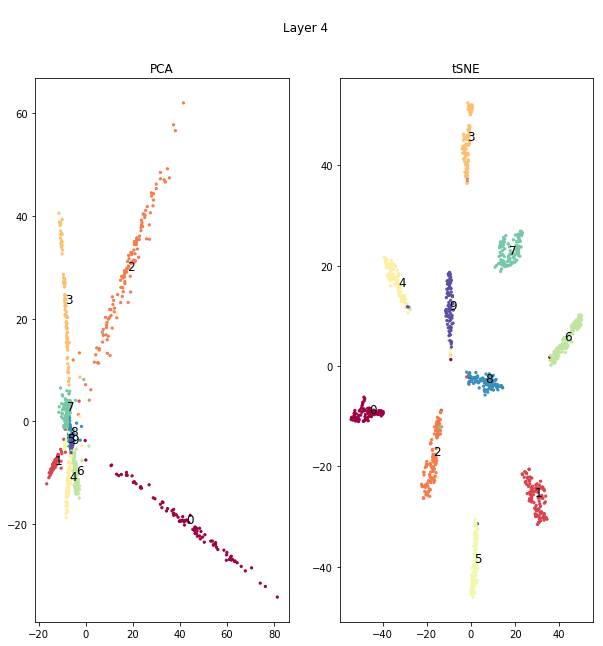

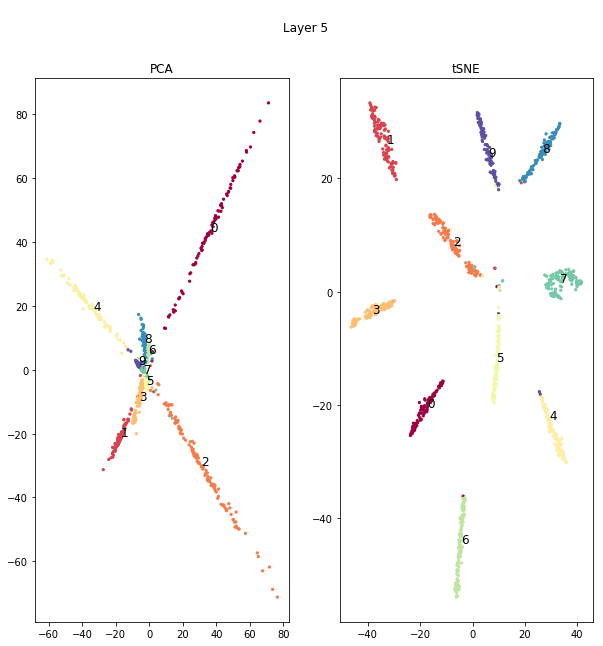

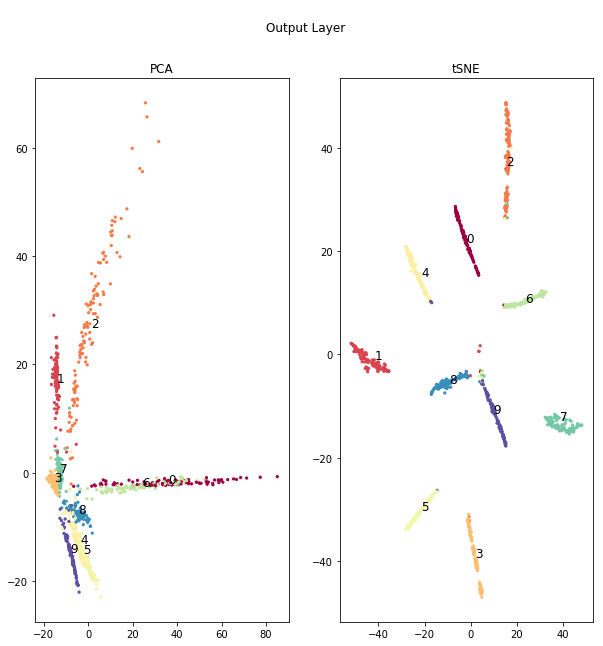

In [0]:
plot_compare_PCA_tsne(hidden_layer1_output,"\nLayer 1")
plot_compare_PCA_tsne(hidden_layer2_output,"\nLayer 2")
plot_compare_PCA_tsne(hidden_layer3_output,"\nLayer 3")
plot_compare_PCA_tsne(hidden_layer4_output,"\nLayer 4")
plot_compare_PCA_tsne(hidden_layer5_output,"\nLayer 5")
plot_compare_PCA_tsne(output_final_layer,"\nOutput Layer")

#### Q 1.8

As we can see above t-SNE is better at making the classes look more distinct compared to PCA.<br>The output layer gives the best seperation for t-SNE. As we start moving from layer 1 to the final layer, at the point of layer 2 itself, we have acheived a good amount of classification for t-SNE.In case of PCA the classes are not properly seperated as PCA  constructs some new characteristics that turn out to summarize our features, which may not be proper to classify.

  


